[Przetwarzanie strumieniowe za pomocą Cloud Pub/Sub i Dataflow: Qwik Start](https://www.cloudskillsboost.google/focuses/18457?catalog_rank=%7B%22rank%22%3A11%2C%22num_filters%22%3A0%2C%22has_search%22%3Atrue%7D&parent=catalog&search_id=22613655)

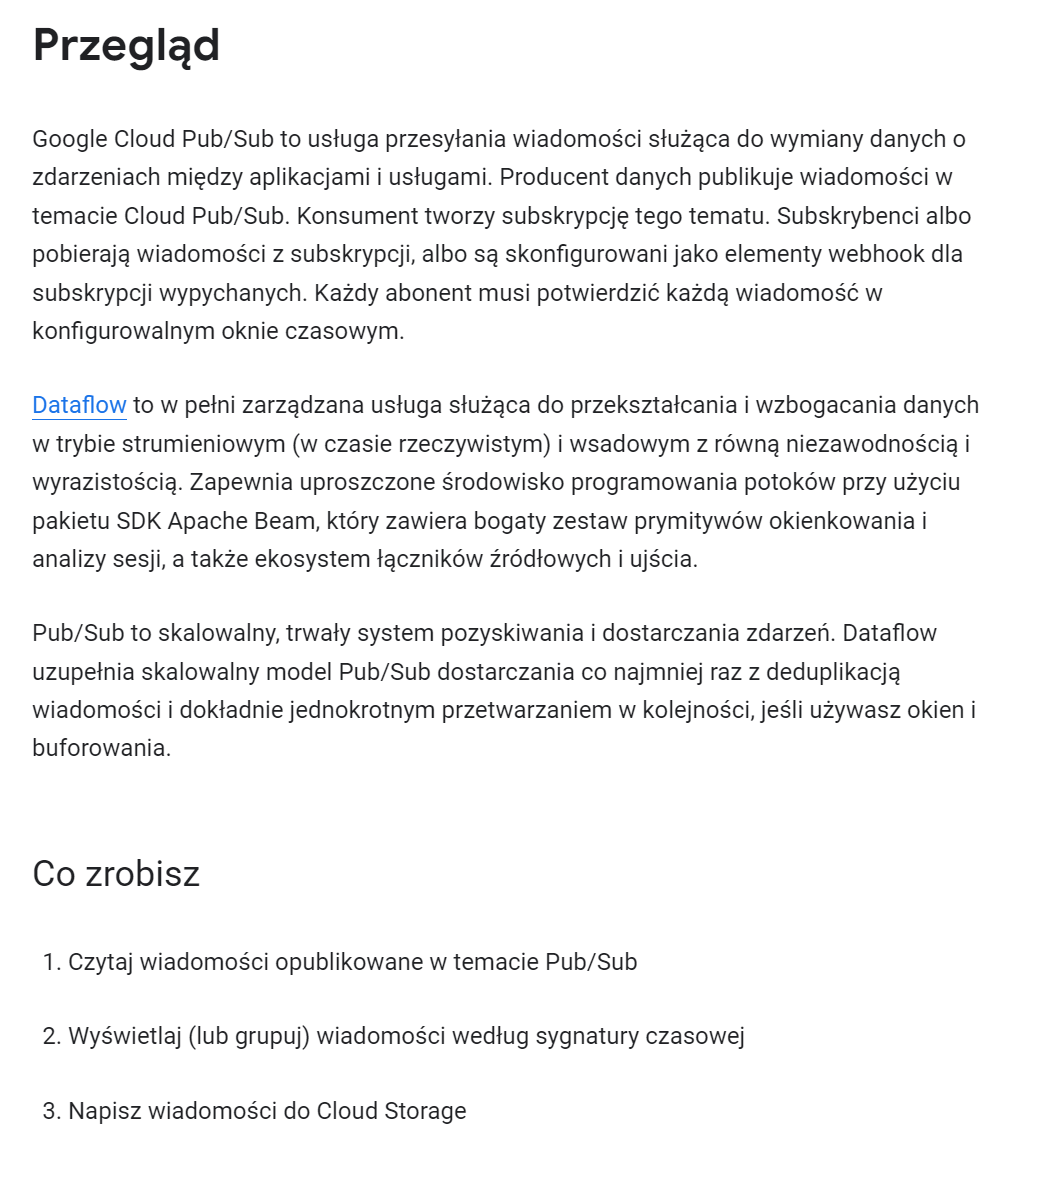

##Zadanie 1. Utwórz zasoby projektu

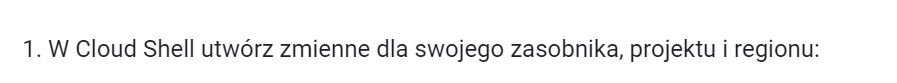

In [ ]:
PROJECT_ID=$(gcloud config get-value project)
BUCKET_NAME=$PROJECT_ID

TOPIC_ID=my-id
REGION=us-central1
AE_REGION=us-central

In [ ]:
echo $PROJECT_ID # empik-ga360
echo $TOPIC_ID # my-id
echo $REGION # us-central1
echo $AE_REGION # us-central

prj-ecom-p-ad-server-1077

In [ ]:
PROJECT_ID=$(gcloud config get-value project)
BUCKET_NAME=$PROJECT_ID

TOPIC_ID=id-423a432624394bf0914cc0aaf27e0640
REGION=europe-central2-a
AE_REGION=europe-central2

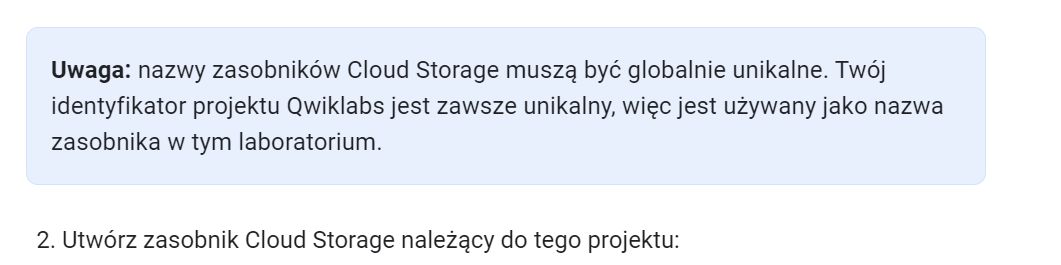

In [ ]:
gsutil mb gs://$BUCKET_NAME

# Creating gs://prj-ecom-p-ad-server-1077/...

In [ ]:
gsutil mb -l $AE_REGION gs://$BUCKET_NAME/

# Creating gs://prj-ecom-p-ad-server-1077/...

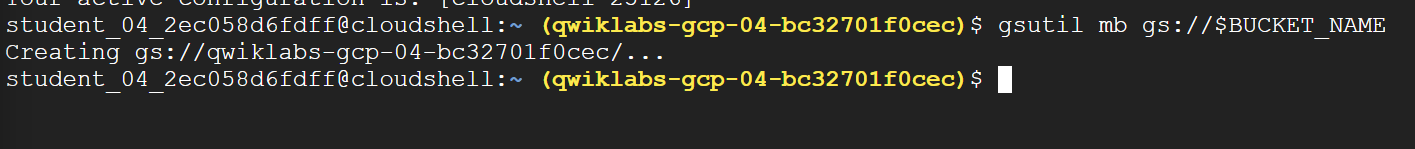

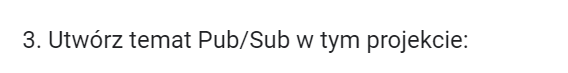

In [ ]:
gcloud pubsub topics create $TOPIC_ID

# Created topic [projects/prj-ecom-p-ad-server-1077/topics/id-423a432624394bf0914cc0aaf27e0640].

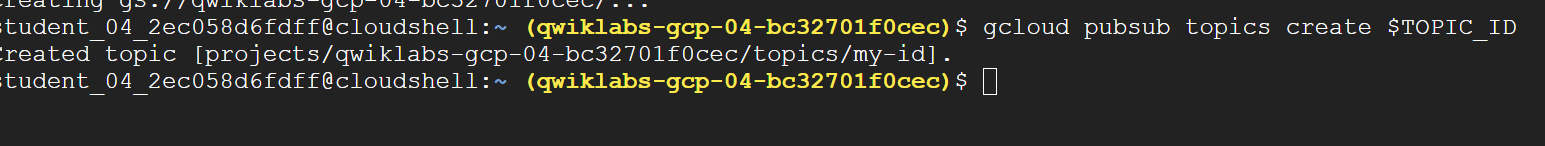

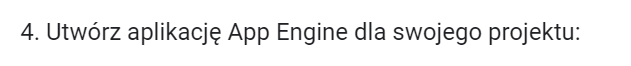

In [ ]:
gcloud app create --region=$AE_REGION

"""You are creating an app for project [prj-ecom-p-ad-server-1077].
WARNING: Creating an App Engine application for a project is irreversible and the region
cannot be changed. More information about regions is at
<https://cloud.google.com/appengine/docs/locations>.

Creating App Engine application in project [prj-ecom-p-ad-server-1077] and region [europe-central2]....done.
Success! The app is now created. Please use `gcloud app deploy` to deploy your first app."""

Ustawienia App Engine

In [ ]:
gcloud app describe

"""authDomain: gmail.com
codeBucket: staging.prj-ecom-p-ad-server-1077.appspot.com
databaseType: CLOUD_FIRESTORE
defaultBucket: prj-ecom-p-ad-server-1077.appspot.com
defaultHostname: prj-ecom-p-ad-server-1077.lm.r.appspot.com
featureSettings:
  splitHealthChecks: true
  useContainerOptimizedOs: true
gcrDomain: eu.gcr.io
id: prj-ecom-p-ad-server-1077
locationId: europe-central2
name: apps/prj-ecom-p-ad-server-1077
serviceAccount: prj-ecom-p-ad-server-1077@appspot.gserviceaccount.com
servingStatus: SERVING"""

In [ ]:
gs://prj-ecom-p-ad-server-1077.appspot.com # defaultBucket
gs://staging.prj-ecom-p-ad-server-1077.appspot.com # codeBucket

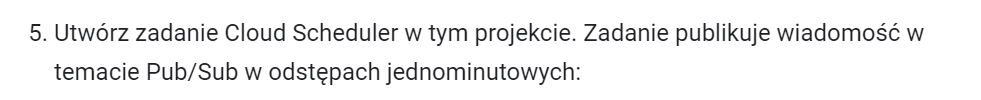

In [ ]:
gcloud scheduler jobs create pubsub publisher-job --schedule="* * * * *" \
    --topic=$TOPIC_ID --message-body="Hello!"

In [ ]:
gcloud scheduler jobs create pubsub publisher-job --schedule="* * * * *" \
    --location=europe-central2 \
    --topic=$TOPIC_ID --message-body="Cloud Dataflow"

"""name: projects/prj-ecom-p-ad-server-1077/locations/europe-central2/jobs/publisher-job
pubsubTarget:
  data: Q2xvdWQgRGF0YWZsb3c=
  topicName: projects/prj-ecom-p-ad-server-1077/topics/id-423a432624394bf0914cc0aaf27e0640
retryConfig:
  maxBackoffDuration: 3600s
  maxDoublings: 16
  maxRetryDuration: 0s
  minBackoffDuration: 5s
schedule: '* * * * *'
state: ENABLED
timeZone: Etc/UTC
userUpdateTime: '2024-02-04T09:06:09Z'"""

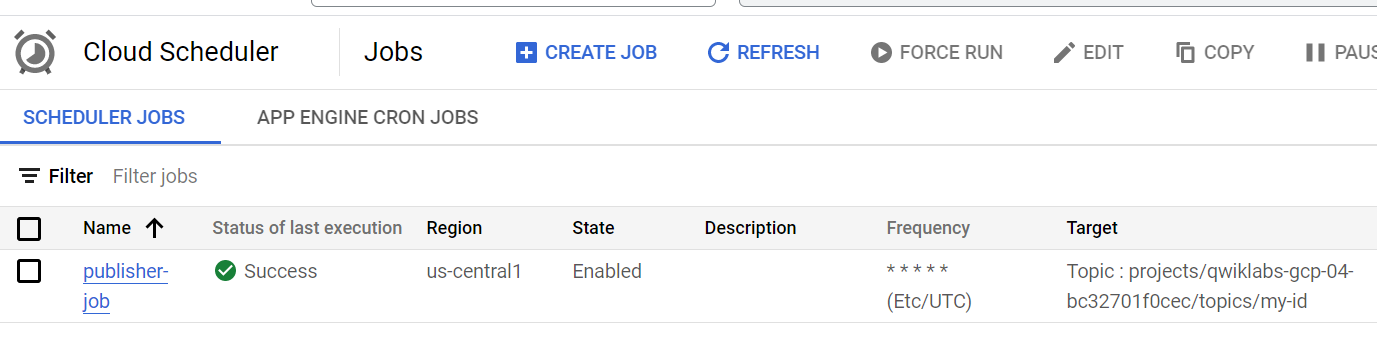

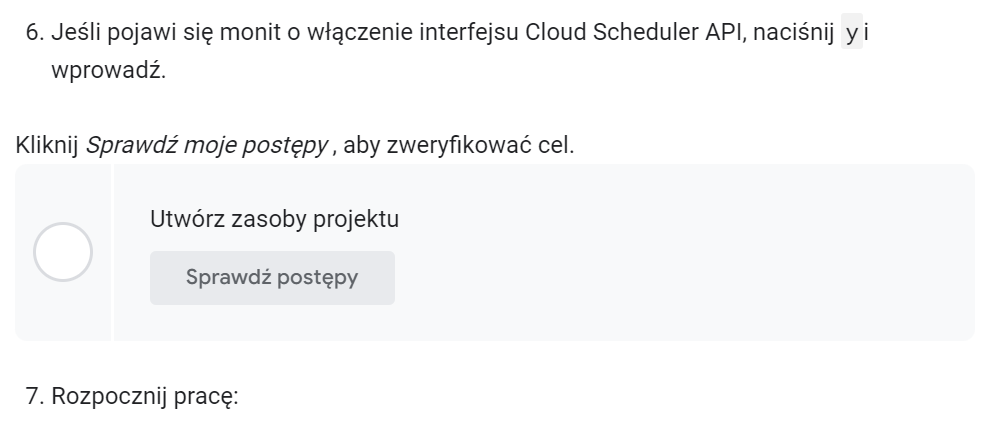

In [ ]:
gcloud scheduler jobs run publisher-job

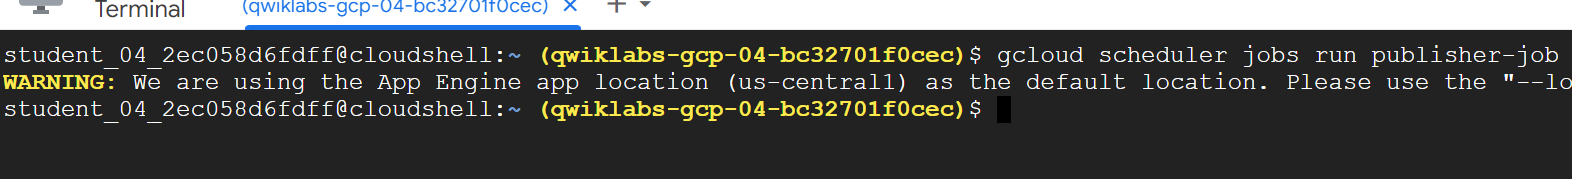

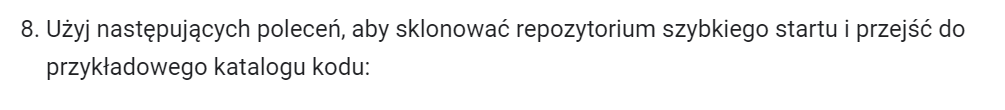

Polecenie, które podałeś, służy do uruchomienia kontenera Docker na podstawie obrazu Pythona w wersji 3.7, z dostępem do interaktywnego terminala (-it) oraz ustawieniem zmiennej środowiskowej DEVSHELL_PROJECT_ID na wartość tej samej zmiennej ze środowiska maszyny hosta. Polecenie /bin/bash na końcu otwiera shell basha wewnątrz kontenera, co pozwala na bezpośrednią interakcję z nim.

Oto szczegółowe rozbicie polecenia:

docker run: Polecenie do tworzenia i uruchamiania kontenera Docker.

-it: Opcja uruchomienia kontenera w trybie interaktywnym z terminalowym interfejsem tekstowym.

-e DEVSHELL_PROJECT_ID=$DEVSHELL_PROJECT_ID: Ustawia zmienną środowiskową wewnątrz kontenera (DEVSHELL_PROJECT_ID) na wartość zmiennej DEVSHELL_PROJECT_ID z maszyny hosta. Jest to przydatne do przekazywania konfiguracji lub zmiennych środowiskowych do kontenera.

python:3.7: Określa obraz Docker, który ma być użyty dla kontenera, w tym przypadku oficjalny obraz Pythona z tagiem wersji 3.7.

/bin/bash: Polecenie, które kontener wykonuje przy starcie, otwierając w tym przypadku shell bash.

Takie ustawienie jest typowo używane w celach deweloperskich i testowych, gdzie może być potrzebne środowisko Pythona izolowane od lokalnej konfiguracji. Pozwala to na pracę w konteneryzowanym środowisku Pythona, które posiada własne zależności i pliki, oddzielone od środowiska maszyny hosta.

Jeśli jesteś nowy w temacie Docker, to platforma do tworzenia, dostarczania i uruchamiania aplikacji w lekkich pakietach nazywanych kontenerami. Kontenery pozwalają na pakowanie aplikacji wraz z jej środowiskiem i zależnościami do pojedynczej jednostki, która może być uruchamiana wszędzie tam, gdzie zainstalowany jest Docker, zapewniając spójność w różnych środowiskach.




In [ ]:
docker run -it -e DEVSHELL_PROJECT_ID=$DEVSHELL_PROJECT_ID python:3.7 /bin/bash

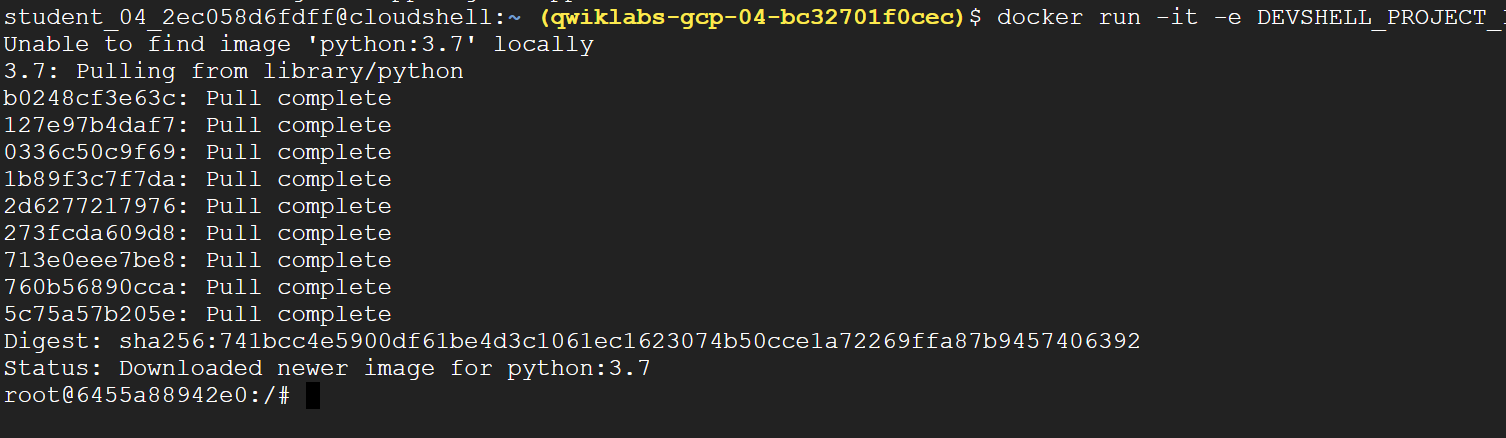

Polecenia, które podałeś, są używane do uruchomienia kontenera Docker z Pythonem, klonowania repozytorium z przykładami dla Google Cloud Platform (GCP) dotyczącymi Pythona, a następnie instalacji wymaganych zależności do uruchomienia przykładu strumieniowej analizy danych z Pub/Sub. Oto krok po kroku, co każde polecenie robi:


`git clone https://github.com/GoogleCloudPlatform/python-docs-samples.git:`

Klonuje repozytorium python-docs-samples od Google Cloud Platform, które zawiera przykłady kodu Python dla różnych usług GCP.

`cd python-docs-samples/pubsub/streaming-analytics:`

Przechodzi do katalogu zawierającego przykłady strumieniowej analizy danych z wykorzystaniem Pub/Sub.

`pip install -U -r requirements.txt:`

Instaluje zależności Pythona wymienione w pliku requirements.txt, które są potrzebne do uruchomienia przykładów strumieniowej analizy danych.


In [ ]:
docker run -it -e DEVSHELL_PROJECT_ID=$DEVSHELL_PROJECT_ID python:3.7 /bin/bash
git clone https://github.com/GoogleCloudPlatform/python-docs-samples.git
cd python-docs-samples/pubsub/streaming-analytics
pip install -U -r requirements.txt

In [ ]:
docker run -it -e DEVSHELL_PROJECT_ID=$DEVSHELL_PROJECT_ID python:3.7 /bin/bash
git clone https://github.com/GoogleCloudPlatform/python-docs-samples.git
cd python-docs-samples/pubsub/streaming-analytics
pip install -U -r requirements.txt  # apache-beam[gcp,test]==2.42.0

Jeśli potrzebujesz trwałego środowiska, które zachowa stan kontenerów Docker między sesjami, rozważ użycie maszyn wirtualnych w Google Compute Engine lub skonfiguruj swoje środowisko w Google Kubernetes Engine, gdzie kontenery mogą być uruchomione na stałe i zarządzane przez Kubernetes.

https://github.com/GoogleCloudPlatform/python-docs-samples/tree/main/pubsub/streaming-analytics

In [ ]:
ls

# PubSubToGCS.py  PubSubToGCS_test.py  README.md  noxfile_config.py  requirements-test.txt  requirements.txt

##Zadanie 2. Przesyłaj strumieniowo wiadomości z Pub/Sub do Cloud Storage

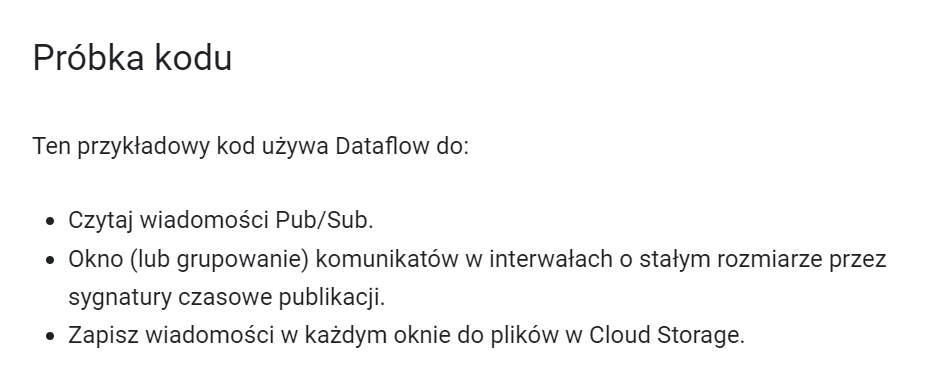

###`PubSubToGCS_test.py`

https://github.com/GoogleCloudPlatform/python-docs-samples/blob/main/pubsub/streaming-analytics/PubSubToGCS_test.py

In [ ]:
"""Kod jest testem jednostkowym (unit test) dla programu PubSubToGCS"""

"""Importuje moduł os, który pozwala na dostęp do funkcji i zmiennych związanych z systemem operacyjnym.
W tym teście może być wykorzystywany do ustawienia zmiennych środowiskowych lub pracy z systemowymi ścieżkami plików."""
import os

"""Importuje moduł mock z pakietu unittest. Moduł mock umożliwia tworzenie
fałszywych obiektów i zastępowanie rzeczywistych obiektów w celu testowania."""
from unittest import mock

"""import uuid: Importuje moduł uuid, który pozwala na generowanie unikalnych
identyfikatorów UUID (Universally Unique Identifier)."""
import uuid

"""Importuje klasę GcsIO z modułu apache_beam.io.gcp.gcsio.
Klasa ta umożliwia operacje na plikach w Google Cloud Storage (GCS)."""
from apache_beam.io.gcp.gcsio import GcsIO

"""Importuje klasę TestPipeline z modułu apache_beam.testing.test_pipeline. Klasa ta służy do tworzenia testowych
potoków przetwarzania danych za pomocą narzędzia Apache Beam."""
from apache_beam.testing.test_pipeline import TestPipeline

"""Importuje klasę TestStream z modułu apache_beam.testing.test_stream. Klasa ta pozwala na tworzenie
strumieni danych testowych do testowania przetwarzania danych w Apache Beam."""
from apache_beam.testing.test_stream import TestStream

"""Importuje klasę TempDir z modułu apache_beam.testing.test_utils.
Klasa ta pomaga w zarządzaniu tymczasowymi katalogami i plikami w środowisku testowym."""
from apache_beam.testing.test_utils import TempDir

"""Importuje klasę TimestampedValue z modułu apache_beam.transforms.window. Klasa ta reprezentuje wartość z
przypisanym znacznikiem czasowym, co jest przydatne w przetwarzaniu strumieni czasowych danych w Apache Beam."""
from apache_beam.transforms.window import TimestampedValue

"""W tym przypadku PubSubToGCS jest importowane, aby użyć go w teście jednostkowym do uruchomienia kodu z
tego modułu lub przetestowania jego zachowania."""
import PubSubToGCS

PROJECT = os.environ["GOOGLE_CLOUD_PROJECT"]
BUCKET = os.environ["CLOUD_STORAGE_BUCKET"]

"""Ta zmienna generuje unikalny identyfikator UUID (Universally Unique Identifier) za pomocą funkcji uuid.uuid1().hex.
Ten identyfikator UUID jest używany w teście do tworzenia unikalnych nazw katalogów i plików w GCS, aby uniknąć
kolizji nazw w środowisku testowym."""
UUID = uuid.uuid1().hex


"""Ten fragment kodu używa dekoratora @mock.patch do zastępowania pewnych komponentów Apache Beam podczas testowania.
Pozwala to na kontrolowanie zachowania tych komponentów podczas testów i zapewnia, że testy są przewidywalne i
izolowane od rzeczywistego środowiska.

Ten dekorator zastępuje klasę Pipeline z biblioteki Apache Beam obiektem TestPipeline.
TestPipeline jest specjalnym obiektem używanym w testach do symulowania i kontrolowania przepływu danych w Apache Beam."""
@mock.patch("apache_beam.Pipeline", TestPipeline)

"""Ten dekorator zastępuje funkcję ReadFromPubSub z biblioteki Apache Beam lambda funkcją.
Lambda funkcja ta zwraca obiekt TestStream, który jest używany do generowania testowych danych w strumieniu Pub/Sub.
Dzięki temu można symulować odczyty z tematu Pub/Sub podczas testowania."""
@mock.patch(
    "apache_beam.io.ReadFromPubSub",

    """Wewnątrz lambda funkcji lambda topic: ... definiowany jest obiekt TestStream, który symuluje dane \
    w strumieniu Pub/Sub. Wywołania advance_watermark_to, advance_processing_time i add_elements
    są używane do symulowania postępu czasu i dodawania elementów do strumienia Pub/Sub.
    Na przykład, advance_watermark_to(0) ustawia znacznik czasu na początku,
    a add_elements([TimestampedValue(b"a", 1575937195)]) dodaje element o treści "a" z czasem 1575937195."""
    lambda topic: (
        TestStream()
        .advance_watermark_to(0)
        .advance_processing_time(30)
        .add_elements([TimestampedValue(b"a", 1575937195)])
        .advance_processing_time(30)
        .add_elements([TimestampedValue(b"b", 1575937225)])
        .advance_processing_time(30)
        .add_elements([TimestampedValue(b"c", 1575937255)])
        .advance_watermark_to_infinity()
    ),
)

"""Ta funkcja wykonuje testowanie przetwarzania danych przy użyciu Apache Beam i symulowanej infrastruktury
Pub/Sub oraz GCS (Google Cloud Storage)."""
def test_pubsub_to_gcs():

    """Wywołuje funkcję PubSubToGCS.run() - Ta funkcja uruchamia przetwarzanie danych w Apache Beam,
    symulując odczyty z tematu Pub/Sub i zapis do GCS. Parametry przekazane do PubSubToGCS.run() to:
    input_topic="unused" - Symulowana nazwa tematu Pub/Sub (nie jest używana w symulacji).
    output_path=f"gs://{BUCKET}/pubsub/{UUID}/output" - Ścieżka, gdzie będą zapisywane dane wyjściowe.
    Jest to ścieżka w GCS, która jest generowana na podstawie zmiennej BUCKET i UUID.
    window_size=1 - Rozmiar okna czasowego w minutach (1 minuta).
    num_shards=1 - Liczba fragmentów (shardów) do przetwarzania."""
    PubSubToGCS.run(
        input_topic="unused",  # mocked by TestStream
        output_path=f"gs://{BUCKET}/pubsub/{UUID}/output",
        window_size=1,  # 1 minute
        num_shards=1,

        """pipeline_args - To lista argumentów przekazywanych do przetwarzania Apache Beam. Zawiera dwie ważne informacje:
        --project - Identyfikator projektu GCP, który jest przekazywany do przetwarzania, aby wskazać projekt,
        którego zasoby są używane.
        --temp_location - Lokalizacja tymczasowa używana podczas przetwarzania.
        Jest to katalog tymczasowy, w którym Apache Beam może przechowywać dane tymczasowe podczas przetwarzania."""
        pipeline_args=[
            "--project",
            PROJECT,
            "--temp_location",
            TempDir().get_path(),
        ],
    )

    """Po uruchomieniu PubSubToGCS.run(), funkcja sprawdza, czy dane wyjściowe zostały zapisane w GCS,
    korzystając z obiektu GcsIO() do listowania plików w GCS i sprawdzając, czy istnieją pliki wynikowe."""
    gcs_client = GcsIO()
    files = gcs_client.list_prefix(f"gs://{BUCKET}/pubsub/{UUID}")
    assert len(files) > 0

    """Funkcja czyszczenia - Po zakończeniu testów, funkcja usuwa pliki wynikowe z GCS
    za pomocą gcs_client.delete_batch(list(files))."""
    # Clean up.
    gcs_client.delete_batch(list(files))

In [ ]:
"""Kod jest testem jednostkowym (unit test) dla programu PubSubToGCS"""

import os
from unittest import mock
import uuid

from apache_beam.io.gcp.gcsio import GcsIO
from apache_beam.testing.test_pipeline import TestPipeline
from apache_beam.testing.test_stream import TestStream
from apache_beam.testing.test_utils import TempDir
from apache_beam.transforms.window import TimestampedValue

import PubSubToGCS

PROJECT = os.environ["GOOGLE_CLOUD_PROJECT"]
BUCKET = os.environ["CLOUD_STORAGE_BUCKET"]
UUID = uuid.uuid1().hex


@mock.patch("apache_beam.Pipeline", TestPipeline)
@mock.patch(
    "apache_beam.io.ReadFromPubSub",
    lambda topic: (
        TestStream()
        .advance_watermark_to(0)
        .advance_processing_time(30)
        .add_elements([TimestampedValue(b"a", 1575937195)])
        .advance_processing_time(30)
        .add_elements([TimestampedValue(b"b", 1575937225)])
        .advance_processing_time(30)
        .add_elements([TimestampedValue(b"c", 1575937255)])
        .advance_watermark_to_infinity()
    ),
)
def test_pubsub_to_gcs():
    PubSubToGCS.run(
        input_topic="unused",  # mocked by TestStream
        output_path=f"gs://{BUCKET}/pubsub/{UUID}/output",
        window_size=1,  # 1 minute
        num_shards=1,
        pipeline_args=[
            "--project",
            PROJECT,
            "--temp_location",
            TempDir().get_path(),
        ],
    )

    # Check for output files on GCS.
    gcs_client = GcsIO()
    files = gcs_client.list_prefix(f"gs://{BUCKET}/pubsub/{UUID}")
    assert len(files) > 0

    # Clean up.
    gcs_client.delete_batch(list(files))

###`requirements-test.txt`

In [ ]:
pytest==7.0.1

###`PubSubToGCS.py`

In [ ]:
# https://github.com/GoogleCloudPlatform/python-docs-samples/blob/main/pubsub/streaming-analytics/PubSubToGCS.py

In [ ]:
"""Ten skrypt Pythona używa Apache Beam do przetwarzania strumieniowego wiadomości z Cloud Pub/Sub i
zapisywania ich do Google Cloud Storage (GCS), grupując je na podstawie czasu publikacji w określonych
oknach czasowych."""

"""Importuje moduł argparse, który jest używany do tworzenia interfejsów linii poleceń. Pozwala programom
Pythona na łatwe parsowanie argumentów i opcji podanych przez użytkownika w linii poleceń."""
import argparse

from datetime import datetime
import logging

"""Importuje moduł random, który jest używany do generowania losowych danych. Może to być przydatne w różnych
scenariuszach, takich jak losowe wybieranie elementów z listy, generowanie losowych liczb w określonym zakresie itp."""
import random


"""DoFn: Jest to klasa bazowa dla funkcji, które są wykonane na każdym elemencie w wejściowym PCollection w Apache Beam.
Służy do definiowania przekształceń, które są stosowane do danych.

GroupByKey: Jest to transformacja w Apache Beam, która grupuje elementy o tym samym kluczu.

io: Moduł io w Apache Beam zawiera różne wejścia/wyjścia, np. do czytania i zapisywania danych z/z do różnych
źródeł i miejsc docelowych jak Google Cloud Storage, BigQuery, itp.

ParDo: Jest to transformacja w Apache Beam, która pozwala na równoległe przetwarzanie każdego elementu w kolekcji
danych przez użytkownika zdefiniowaną funkcję DoFn.

Pipeline: Reprezentuje potok przetwarzania w Apache Beam, który definiuje zestaw transformacji danych
od wejścia do wyjścia.

PTransform: Jest to klasa bazowa dla wszystkich transformacji w Apache Beam. Transformacje w Apache Beam są
zdefiniowane przez dziedziczenie z PTransform.

WindowInto: Jest to transformacja, która pozwala na grupowanie elementów w PCollection do "okien"
opartych na czasie, liczbie elementów, lub innych kryteriach.

WithKeys: Jest to transformacja, która przypisuje klucz do każdego elementu w PCollection,
tworząc pary klucz-wartość."""
from apache_beam import DoFn, GroupByKey, io, ParDo, Pipeline, PTransform, WindowInto, WithKeys

"""Umożliwia konfigurację potoku Apache Beam, w tym ustawień związanych z uruchomieniem potoku,
takich jak opcje klastra, debugowanie i inne."""
from apache_beam.options.pipeline_options import PipelineOptions

"""Jest to strategia okienkowania, która dzieli dane na okna o stałej długości,
pozwalając na przetwarzanie danych w określonych przedziałach czasowych."""
from apache_beam.transforms.window import FixedWindows

class GroupMessagesByFixedWindows(PTransform):
    """A composite transform that groups Pub/Sub messages based on publish time
    and outputs a list of tuples, each containing a message and its publish time.
    """

    def __init__(self, window_size, num_shards=5):
        # Set window size to 60 seconds.
        self.window_size = int(window_size * 60)
        self.num_shards = num_shards

    def expand(self, pcoll):
        return (
            pcoll
            # Bind window info to each element using element timestamp (or publish time).
            | "Window into fixed intervals"
            >> WindowInto(FixedWindows(self.window_size))
            | "Add timestamp to windowed elements" >> ParDo(AddTimestamp())
            # Assign a random key to each windowed element based on the number of shards.
            | "Add key" >> WithKeys(lambda _: random.randint(0, self.num_shards - 1))
            # Group windowed elements by key. All the elements in the same window must fit
            # memory for this. If not, you need to use `beam.util.BatchElements`.
            | "Group by key" >> GroupByKey()
        )


class AddTimestamp(DoFn):
    def process(self, element, publish_time=DoFn.TimestampParam):
        """Processes each windowed element by extracting the message body and its
        publish time into a tuple.
        """
        yield (
            element.decode("utf-8"),
            datetime.utcfromtimestamp(float(publish_time)).strftime(
                "%Y-%m-%d %H:%M:%S.%f"
            ),
        )


class WriteToGCS(DoFn):
    def __init__(self, output_path):
        self.output_path = output_path

    def process(self, key_value, window=DoFn.WindowParam):
        """Write messages in a batch to Google Cloud Storage."""

        ts_format = "%H:%M"
        window_start = window.start.to_utc_datetime().strftime(ts_format)
        window_end = window.end.to_utc_datetime().strftime(ts_format)
        shard_id, batch = key_value
        filename = "-".join([self.output_path, window_start, window_end, str(shard_id)])

        with io.gcsio.GcsIO().open(filename=filename, mode="w") as f:
            for message_body, publish_time in batch:
                f.write(f"{message_body},{publish_time}\n".encode("utf-8"))


def run(input_topic, output_path, window_size=1.0, num_shards=5, pipeline_args=None):
    # Set `save_main_session` to True so DoFns can access globally imported modules.
    pipeline_options = PipelineOptions(
        pipeline_args, streaming=True, save_main_session=True
    )

    with Pipeline(options=pipeline_options) as pipeline:
        (
            pipeline
            # Because `timestamp_attribute` is unspecified in `ReadFromPubSub`, Beam
            # binds the publish time returned by the Pub/Sub server for each message
            # to the element's timestamp parameter, accessible via `DoFn.TimestampParam`.
            # https://beam.apache.org/releases/pydoc/current/apache_beam.io.gcp.pubsub.html#apache_beam.io.gcp.pubsub.ReadFromPubSub
            | "Read from Pub/Sub" >> io.ReadFromPubSub(topic=input_topic)
            | "Window into" >> GroupMessagesByFixedWindows(window_size, num_shards)
            | "Write to GCS" >> ParDo(WriteToGCS(output_path))
        )


if __name__ == "__main__":
    logging.getLogger().setLevel(logging.INFO)

    parser = argparse.ArgumentParser()
    parser.add_argument(
        "--input_topic",
        help="The Cloud Pub/Sub topic to read from."
        '"projects/prj-ecom-p-ad-server-1077/topics/id-423a432624394bf0914cc0aaf27e0640".',
    )
    parser.add_argument(
        "--window_size",
        type=float,
        default=1.0,
        help="Output file's window size in minutes.",
    )
    parser.add_argument(
        "--output_path",
        help="Path of the output GCS file including the prefix.",
    )
    parser.add_argument(
        "--num_shards",
        type=int,
        default=5,
        help="Number of shards to use when writing windowed elements to GCS.",
    )
    known_args, pipeline_args = parser.parse_known_args()

    run(
        known_args.input_topic,
        known_args.output_path,
        known_args.window_size,
        known_args.num_shards,
        pipeline_args,
    )
# [END pubsub_to_gcs]

In [ ]:
# Copyright 2019 Google LLC.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#       http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# [START pubsub_to_gcs]
import argparse
from datetime import datetime
import logging
import random

from apache_beam import DoFn, GroupByKey, io, ParDo, Pipeline, PTransform, WindowInto, WithKeys
from apache_beam.options.pipeline_options import PipelineOptions
from apache_beam.transforms.window import FixedWindows


class GroupMessagesByFixedWindows(PTransform):
    """A composite transform that groups Pub/Sub messages based on publish time
    and outputs a list of tuples, each containing a message and its publish time.
    """

    def __init__(self, window_size, num_shards=5):
        # Set window size to 60 seconds.
        self.window_size = int(window_size * 60)
        self.num_shards = num_shards

    def expand(self, pcoll):
        return (
            pcoll
            # Bind window info to each element using element timestamp (or publish time).
            | "Window into fixed intervals"
            >> WindowInto(FixedWindows(self.window_size))
            | "Add timestamp to windowed elements" >> ParDo(AddTimestamp())
            # Assign a random key to each windowed element based on the number of shards.
            | "Add key" >> WithKeys(lambda _: random.randint(0, self.num_shards - 1))
            # Group windowed elements by key. All the elements in the same window must fit
            # memory for this. If not, you need to use `beam.util.BatchElements`.
            | "Group by key" >> GroupByKey()
        )


class AddTimestamp(DoFn):
    def process(self, element, publish_time=DoFn.TimestampParam):
        """Processes each windowed element by extracting the message body and its
        publish time into a tuple.
        """
        yield (
            element.decode("utf-8"),
            datetime.utcfromtimestamp(float(publish_time)).strftime(
                "%Y-%m-%d %H:%M:%S.%f"
            ),
        )


class WriteToGCS(DoFn):
    def __init__(self, output_path):
        self.output_path = output_path

    def process(self, key_value, window=DoFn.WindowParam):
        """Write messages in a batch to Google Cloud Storage."""

        ts_format = "%H:%M"
        window_start = window.start.to_utc_datetime().strftime(ts_format)
        window_end = window.end.to_utc_datetime().strftime(ts_format)
        shard_id, batch = key_value
        filename = "-".join([self.output_path, window_start, window_end, str(shard_id)])

        with io.gcsio.GcsIO().open(filename=filename, mode="w") as f:
            for message_body, publish_time in batch:
                f.write(f"{message_body},{publish_time}\n".encode("utf-8"))


def run(input_topic, output_path, window_size=1.0, num_shards=5, pipeline_args=None):
    # Set `save_main_session` to True so DoFns can access globally imported modules.
    pipeline_options = PipelineOptions(
        pipeline_args, streaming=True, save_main_session=True
    )

    with Pipeline(options=pipeline_options) as pipeline:
        (
            pipeline
            # Because `timestamp_attribute` is unspecified in `ReadFromPubSub`, Beam
            # binds the publish time returned by the Pub/Sub server for each message
            # to the element's timestamp parameter, accessible via `DoFn.TimestampParam`.
            # https://beam.apache.org/releases/pydoc/current/apache_beam.io.gcp.pubsub.html#apache_beam.io.gcp.pubsub.ReadFromPubSub
            | "Read from Pub/Sub" >> io.ReadFromPubSub(topic=input_topic)
            | "Window into" >> GroupMessagesByFixedWindows(window_size, num_shards)
            | "Write to GCS" >> ParDo(WriteToGCS(output_path))
        )


if __name__ == "__main__":
    logging.getLogger().setLevel(logging.INFO)

    parser = argparse.ArgumentParser()
    parser.add_argument(
        "--input_topic",
        help="The Cloud Pub/Sub topic to read from."
        '"projects/<PROJECT_ID>/topics/<TOPIC_ID>".',
    )
    parser.add_argument(
        "--window_size",
        type=float,
        default=1.0,
        help="Output file's window size in minutes.",
    )
    parser.add_argument(
        "--output_path",
        help="Path of the output GCS file including the prefix.",
    )
    parser.add_argument(
        "--num_shards",
        type=int,
        default=5,
        help="Number of shards to use when writing windowed elements to GCS.",
    )
    known_args, pipeline_args = parser.parse_known_args()

    run(
        known_args.input_topic,
        known_args.output_path,
        known_args.window_size,
        known_args.num_shards,
        pipeline_args,
    )
# [END pubsub_to_gcs]

###`requirements.txt`

In [ ]:
apache-beam[gcp,test]==2.53.0

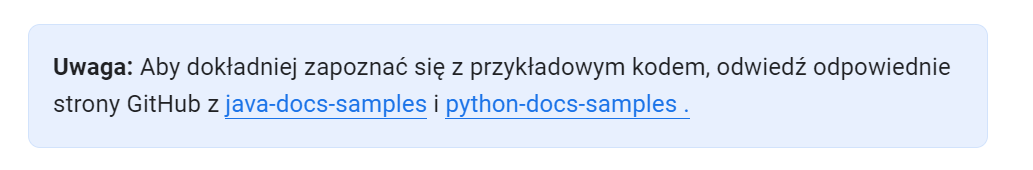

In [ ]:
# https://github.com/GoogleCloudPlatform/python-docs-samples/blob/HEAD/pubsub/streaming-analytics/PubSubToGCS.py

##Zadanie 3. Uruchom potok

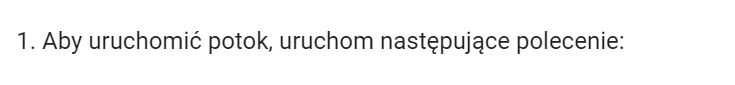

In [ ]:
python PubSubToGCS.py \
    --project=gcp_project_id \
    --region=us-central1 \
    --input_topic=projects/gcp_project_id/topics/my-id \

    """Określa kubełek Google Cloud Storage i ścieżkę, gdzie zostanie zapisany wynik potoku.
    Zastąp BUCKET_NAME nazwą twojego kubełka Cloud Storage."""
    --output_path=gs://BUCKET_NAME/samples/output \

    """Instruuje Apache Beam, aby użyć wykonawcy Dataflow do uruchomienia potoku.
    Potoki Apache Beam mogą być wykonane na różnych wykonawcach, ale DataflowRunner jest specjalnie zaprojektowany
    dla Google Cloud Dataflow."""
    --runner=DataflowRunner \

    """Ustawia rozmiar okna dla potoku w minutach.
    Oznacza to, że przychodzące dane będą grupowane w okna po 2 minuty każde do przetwarzania."""
    --window_size=2 \

    """Określa liczbę fragmentów (lub części), na które zostaną podzielone pliki wyjściowe.
    Może to pomóc w zarządzaniu rozmiarami plików wyjściowych i optymalizacji przetwarzania równoległego."""
    --num_shards=2 \

    """Podaje ścieżkę Cloud Storage do przechowywania tymczasowych plików potrzebnych podczas wykonania potoku.
    Zastąp BUCKET_NAME nazwą twojego kubełka Cloud Storage."""
    --temp_location=gs://BUCKET_NAME/temp

In [ ]:
 # gcp_project_id = qwiklabs-gcp-04-74da1df9bfe4

python PubSubToGCS.py \
    --project=qwiklabs-gcp-04-74da1df9bfe4 \
    --region=us-central1 \
    --input_topic=projects/qwiklabs-gcp-04-74da1df9bfe4/topics/my-id \
    --output_path=gs://qwiklabs-gcp-04-74da1df9bfe4/samples/output \
    --runner=DataflowRunner \
    --window_size=2 \
    --num_shards=2 \
    --temp_location=gs://qwiklabs-gcp-04-74da1df9bfe4/temp

In [ ]:
python PubSubToGCS.py \
    --project=prj-ecom-p-ad-server-1077 \
    --region=europe-central2 \
    --input_topic=projects/prj-ecom-p-ad-server-1077/topics/id-423a432624394bf0914cc0aaf27e0640 \
    --output_path=gs://prj-ecom-p-ad-server-1077/samples/output \
    --runner=DataflowRunner \
    --window_size=2 \
    --num_shards=2 \
    --temp_location=gs://prj-ecom-p-ad-server-1077/temp

In [ ]:
gcloud dataflow jobs cancel 2024-02-04_04_01_41-7032083819952299226 --region=europe-central2

2024-02-04_04_01_41-7032083819952299226

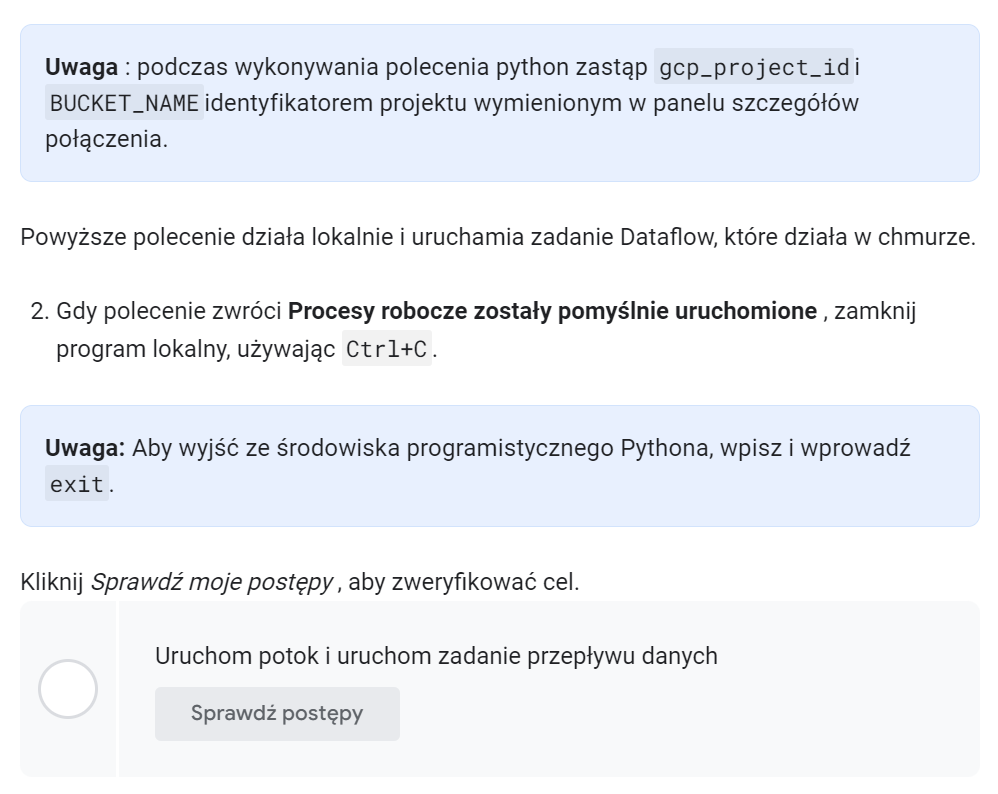

##Zadanie 4. Obserwuj postęp zadania i potoku

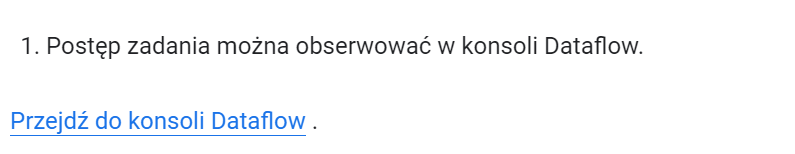

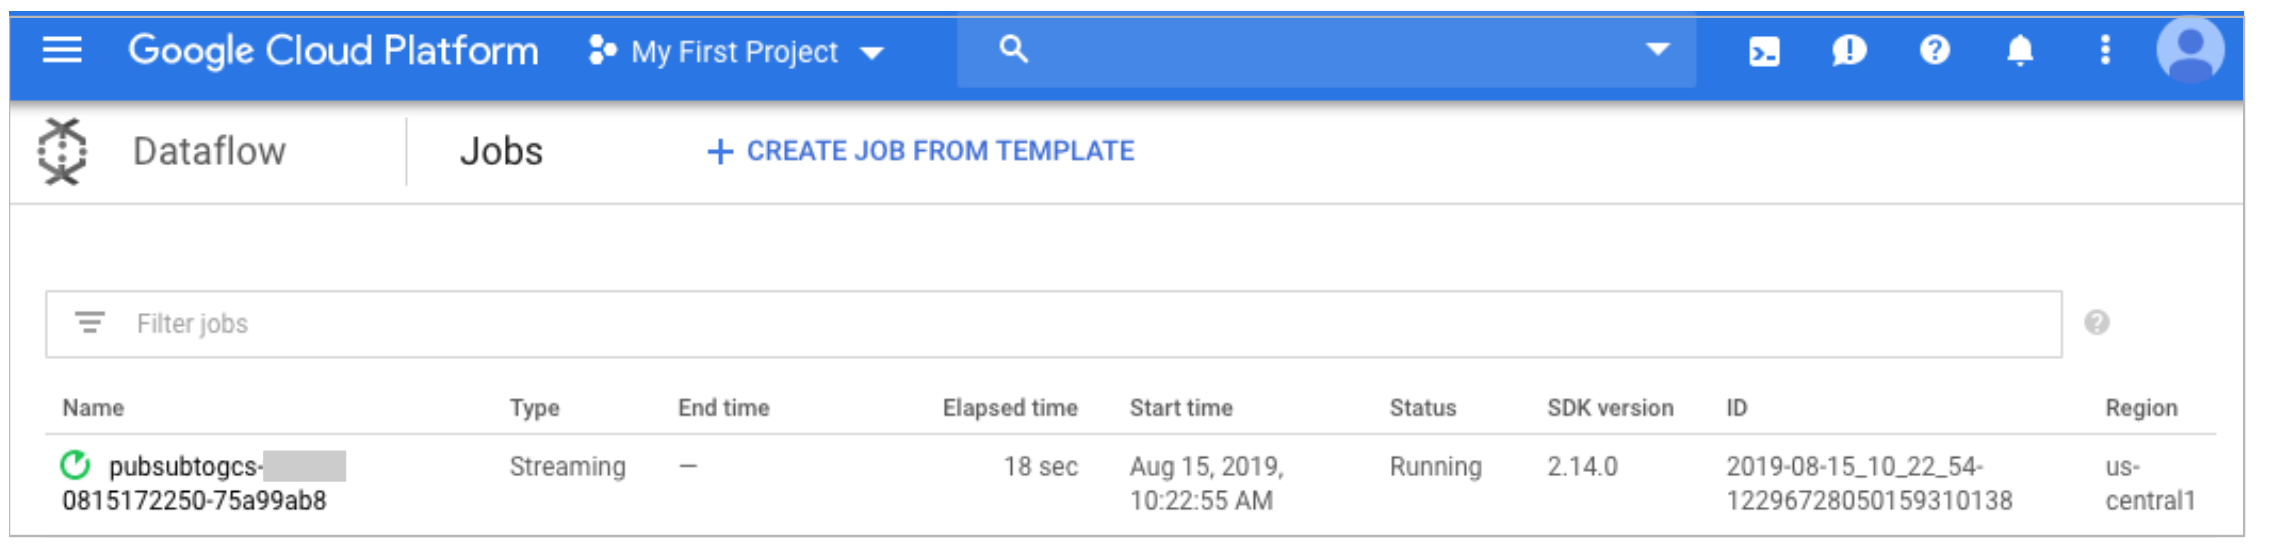

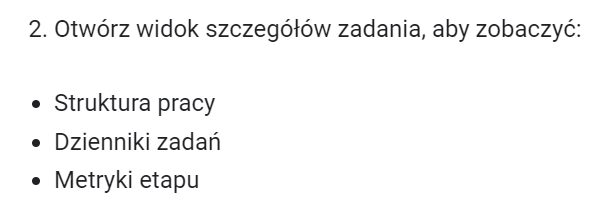

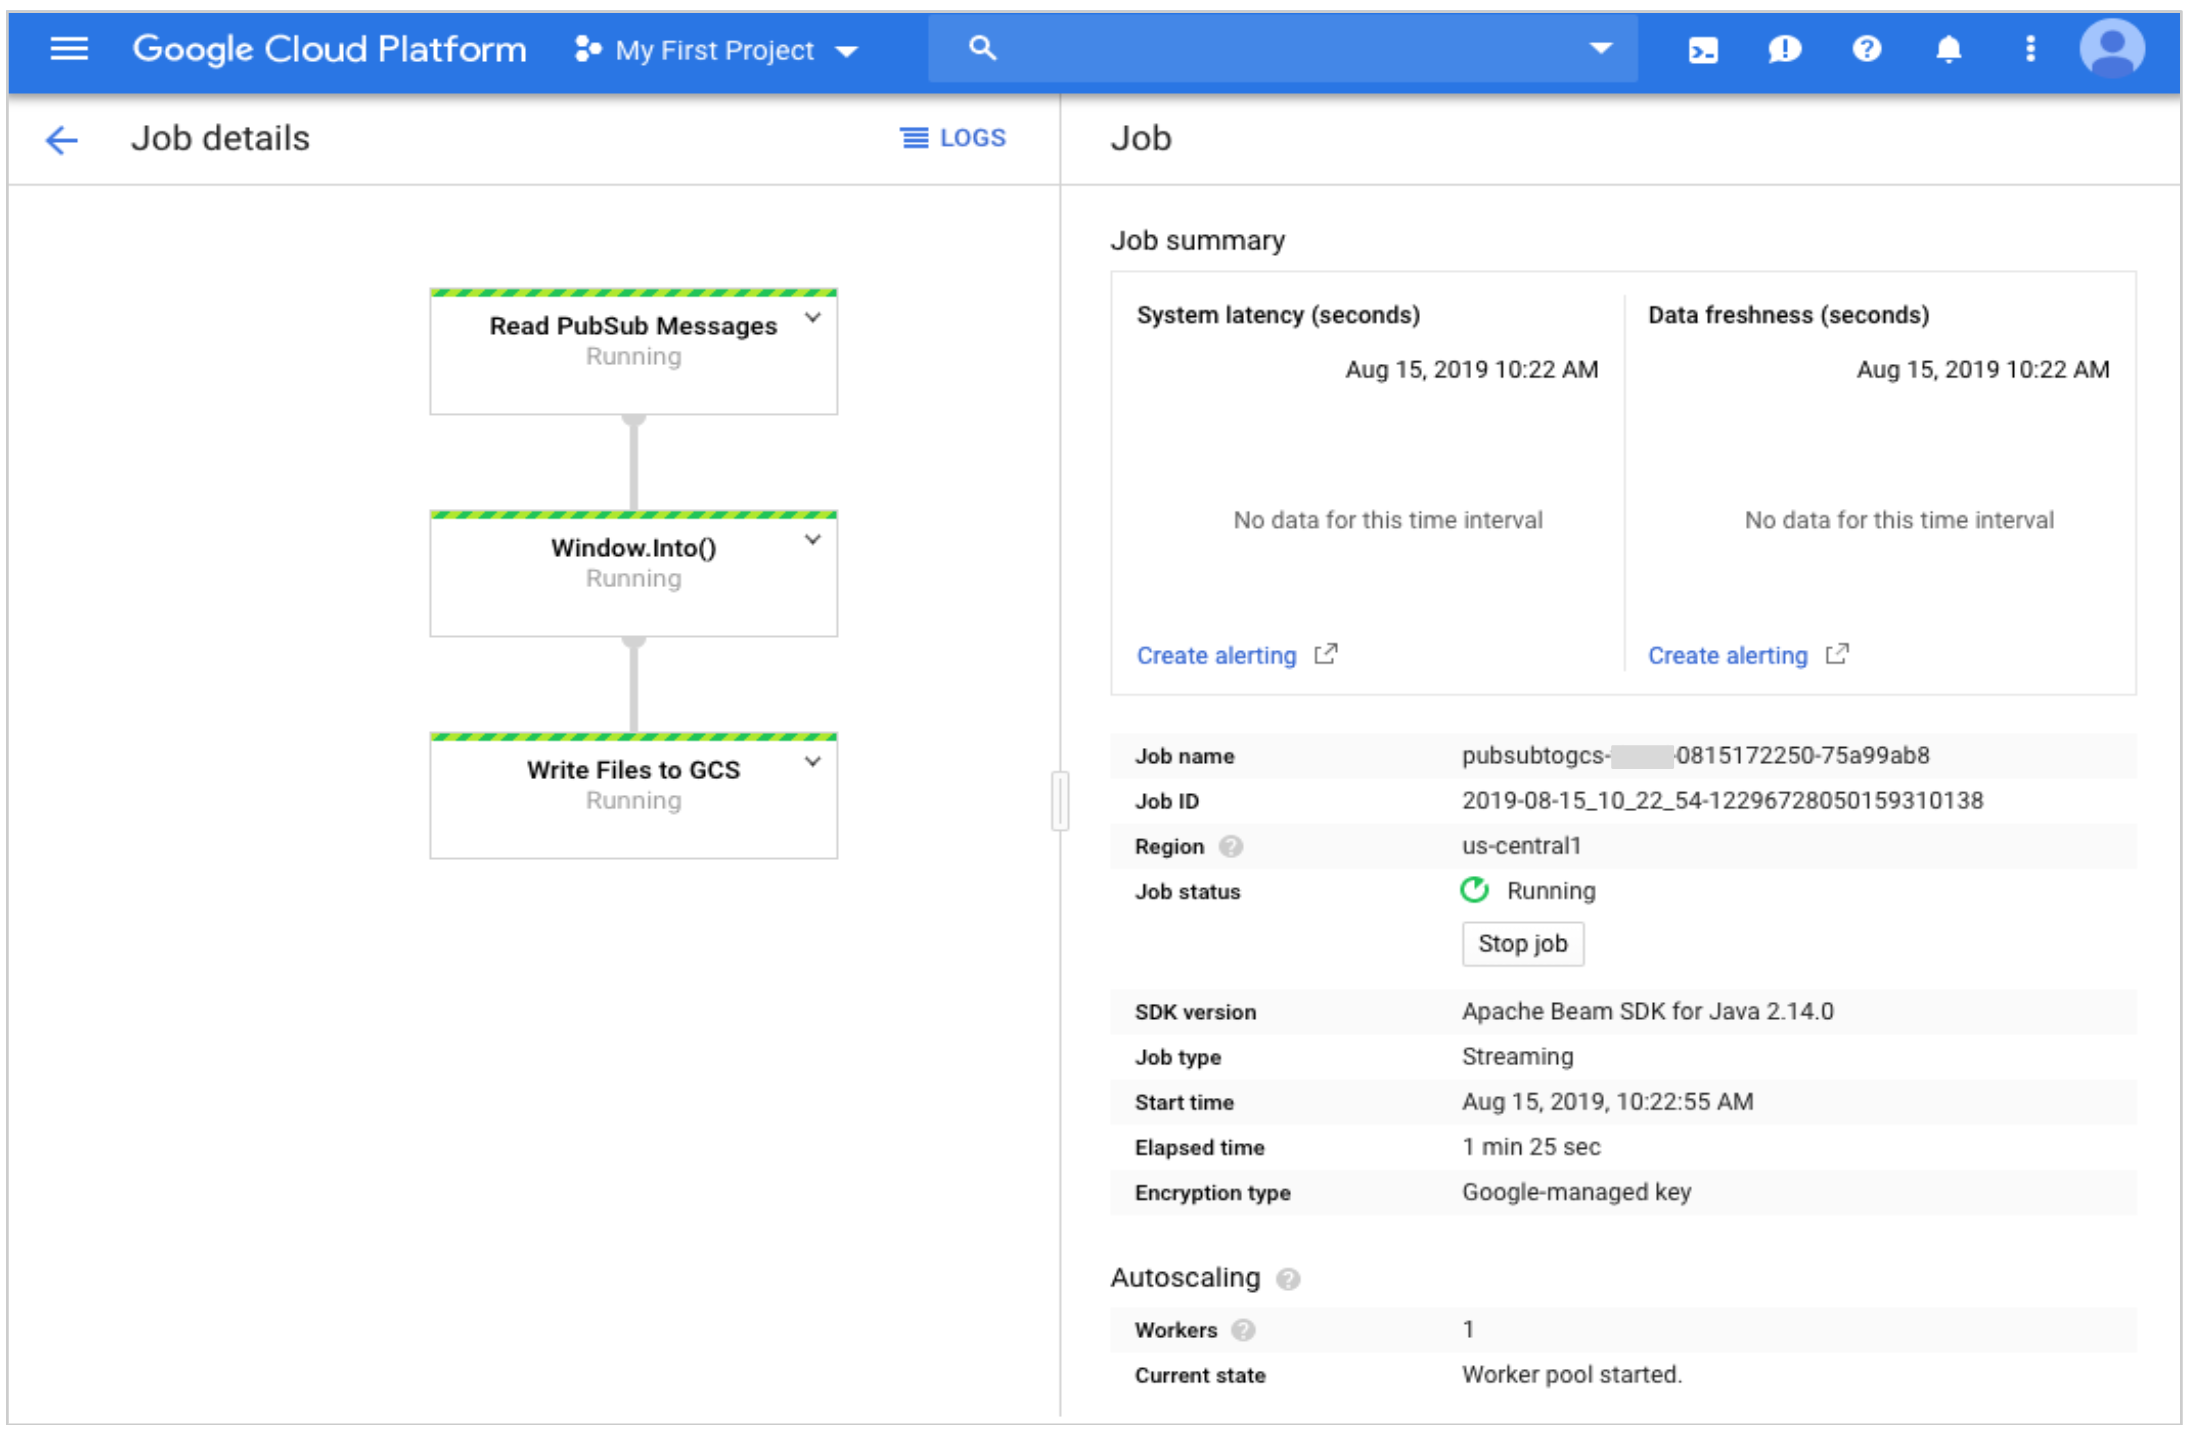

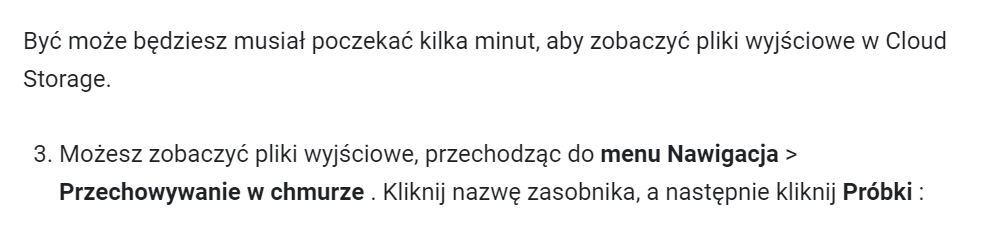

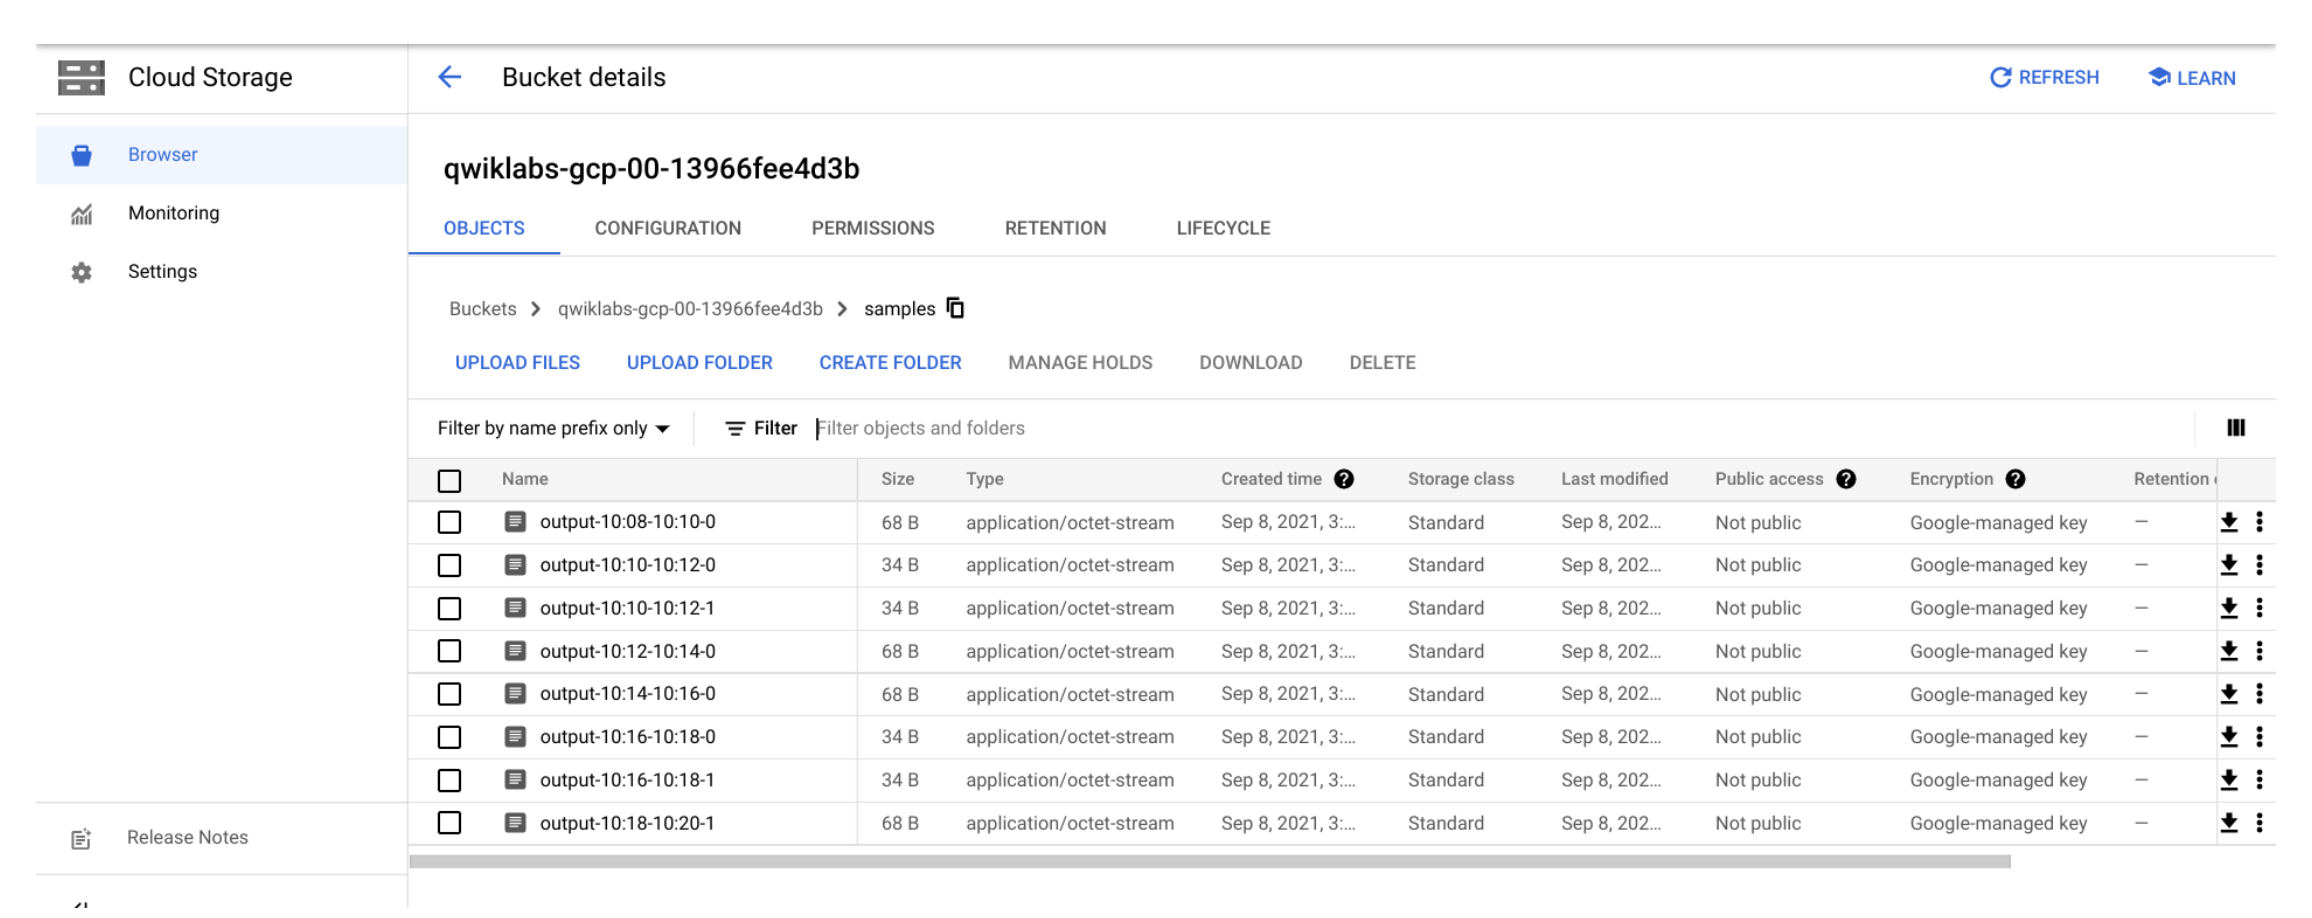

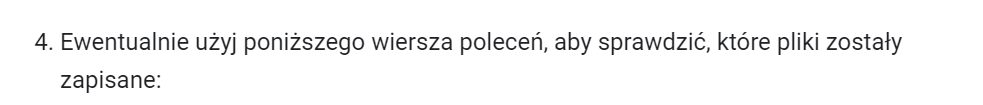

In [ ]:
gsutil ls gs://${BUCKET_NAME}/samples/

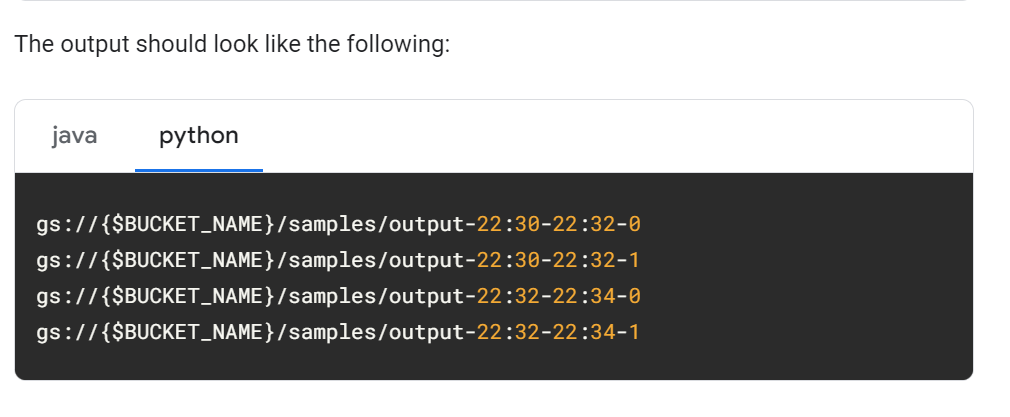

##Zadanie 5. Sprzątanie

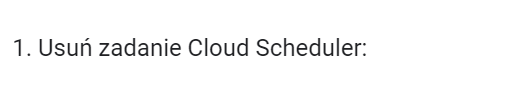

In [ ]:
gcloud scheduler jobs delete publisher-job

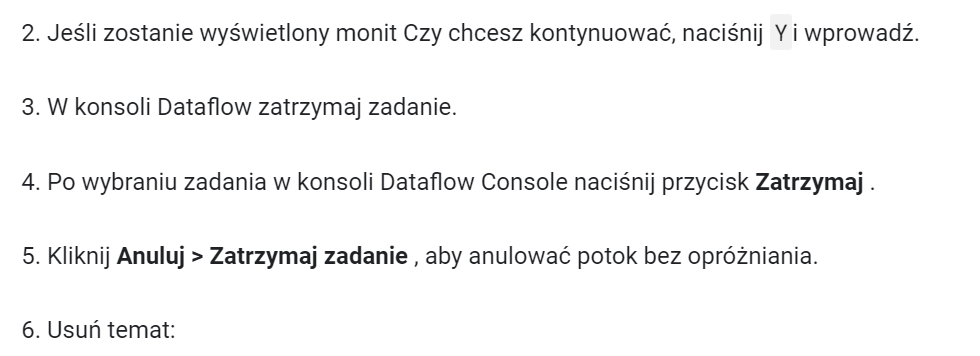

In [ ]:
gcloud pubsub topics delete $TOPIC_ID

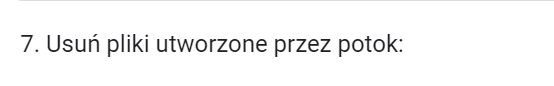

In [ ]:
gsutil -m rm -rf "gs://${BUCKET_NAME}/samples/output*"
gsutil -m rm -rf "gs://${BUCKET_NAME}/temp/*"

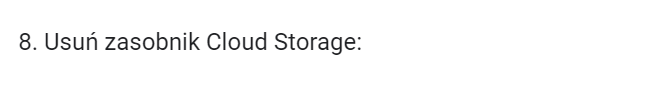

In [ ]:
gsutil rb gs://${BUCKET_NAME}

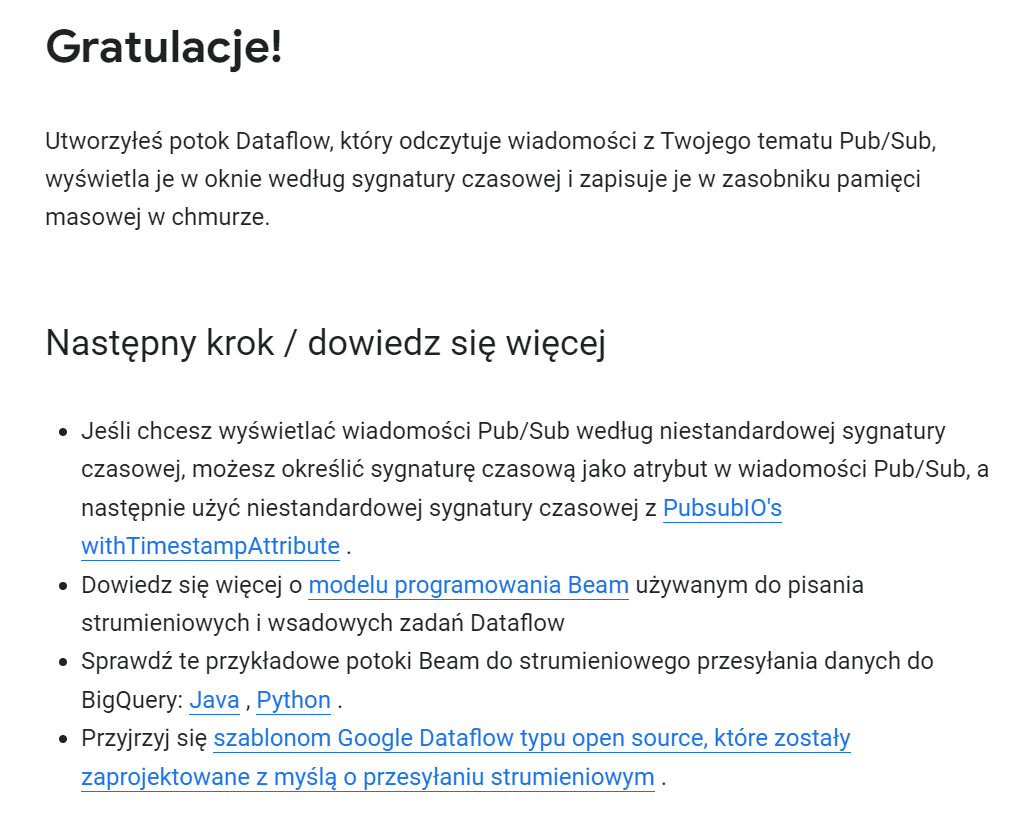

In [ ]:
# https://beam.apache.org/releases/javadoc/current/org/apache/beam/sdk/io/gcp/pubsub/PubsubIO.Read.html#withTimestampAttribute-java.lang.String-
# https://cloud.google.com/dataflow/docs/concepts/beam-programming-model
# https://cloud.google.com/dataflow/docs/guides/templates/provided-streaming

###`streaming_beam.py`

In [ ]:
https://github.com/GoogleCloudPlatform/python-docs-samples/blob/main/dataflow/flex-templates/streaming_beam/streaming_beam.py

In [ ]:
#!/usr/bin/env python
#
# Copyright 2020 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

"""An Apache Beam streaming pipeline example.
It reads JSON encoded messages from Pub/Sub, transforms the message data and
writes the results to BigQuery.
"""

import argparse
import json
import logging
import time
from typing import Any, Dict, List

import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions
import apache_beam.transforms.window as window

# Defines the BigQuery schema for the output table.
SCHEMA = ",".join(
    [
        "url:STRING",
        "num_reviews:INTEGER",
        "score:FLOAT64",
        "first_date:TIMESTAMP",
        "last_date:TIMESTAMP",
    ]
)


def parse_json_message(message: str) -> Dict[str, Any]:
    """Parse the input json message and add 'score' & 'processing_time' keys."""
    row = json.loads(message)
    return {
        "url": row["url"],
        "score": 1.0 if row["review"] == "positive" else 0.0,
        "processing_time": int(time.time()),
    }


def run(
    input_subscription: str,
    output_table: str,
    window_interval_sec: int = 60,
    beam_args: List[str] = None,
) -> None:
    """Build and run the pipeline."""
    options = PipelineOptions(beam_args, save_main_session=True, streaming=True)

    with beam.Pipeline(options=options) as pipeline:
        messages = (
            pipeline
            | "Read from Pub/Sub"
            >> beam.io.ReadFromPubSub(
                subscription=input_subscription
            ).with_output_types(bytes)
            | "UTF-8 bytes to string" >> beam.Map(lambda msg: msg.decode("utf-8"))
            | "Parse JSON messages" >> beam.Map(parse_json_message)
            | "Fixed-size windows"
            >> beam.WindowInto(window.FixedWindows(window_interval_sec, 0))
            | "Add URL keys" >> beam.WithKeys(lambda msg: msg["url"])
            | "Group by URLs" >> beam.GroupByKey()
            | "Get statistics"
            >> beam.MapTuple(
                lambda url, messages: {
                    "url": url,
                    "num_reviews": len(messages),
                    "score": sum(msg["score"] for msg in messages) / len(messages),
                    "first_date": min(msg["processing_time"] for msg in messages),
                    "last_date": max(msg["processing_time"] for msg in messages),
                }
            )
        )

        # Output the results into BigQuery table.
        _ = messages | "Write to Big Query" >> beam.io.WriteToBigQuery(
            output_table, schema=SCHEMA
        )


if __name__ == "__main__":
    logging.getLogger().setLevel(logging.INFO)

    parser = argparse.ArgumentParser()
    parser.add_argument(
        "--output_table",
        help="Output BigQuery table for results specified as: "
        "PROJECT:DATASET.TABLE or DATASET.TABLE.",
    )
    parser.add_argument(
        "--input_subscription",
        help="Input PubSub subscription of the form "
        '"projects/<PROJECT>/subscriptions/<SUBSCRIPTION>."',
    )
    parser.add_argument(
        "--window_interval_sec",
        default=60,
        type=int,
        help="Window interval in seconds for grouping incoming messages.",
    )
    args, beam_args = parser.parse_known_args()

    run(
        input_subscription=args.input_subscription,
        output_table=args.output_table,
        window_interval_sec=args.window_interval_sec,
        beam_args=beam_args,
    )

###`wordcount.py`

In [ ]:
https://github.com/apache/beam/blob/master/sdks/python/apache_beam/examples/wordcount.py

In [ ]:
#
# Licensed to the Apache Software Foundation (ASF) under one or more
# contributor license agreements.  See the NOTICE file distributed with
# this work for additional information regarding copyright ownership.
# The ASF licenses this file to You under the Apache License, Version 2.0
# (the "License"); you may not use this file except in compliance with
# the License.  You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

"""A word-counting workflow."""

# pytype: skip-file

# beam-playground:
#   name: WordCount
#   description: An example that counts words in Shakespeare's works.
#   multifile: false
#   pipeline_options: --output output.txt
#   context_line: 44
#   categories:
#     - Combiners
#     - Options
#     - Quickstart
#   complexity: MEDIUM
#   tags:
#     - options
#     - count
#     - combine
#     - strings

import argparse
import logging
import re

import apache_beam as beam
from apache_beam.io import ReadFromText
from apache_beam.io import WriteToText
from apache_beam.options.pipeline_options import PipelineOptions
from apache_beam.options.pipeline_options import SetupOptions


class WordExtractingDoFn(beam.DoFn):
  """Parse each line of input text into words."""
  def process(self, element):
    """Returns an iterator over the words of this element.
    The element is a line of text.  If the line is blank, note that, too.
    Args:
      element: the element being processed
    Returns:
      The processed element.
    """
    return re.findall(r'[\w\']+', element, re.UNICODE)


def run(argv=None, save_main_session=True):
  """Main entry point; defines and runs the wordcount pipeline."""
  parser = argparse.ArgumentParser()
  parser.add_argument(
      '--input',
      dest='input',
      default='gs://dataflow-samples/shakespeare/kinglear.txt',
      help='Input file to process.')
  parser.add_argument(
      '--output',
      dest='output',
      required=True,
      help='Output file to write results to.')
  known_args, pipeline_args = parser.parse_known_args(argv)

  # We use the save_main_session option because one or more DoFn's in this
  # workflow rely on global context (e.g., a module imported at module level).
  pipeline_options = PipelineOptions(pipeline_args)
  pipeline_options.view_as(SetupOptions).save_main_session = save_main_session

  # The pipeline will be run on exiting the with block.
  with beam.Pipeline(options=pipeline_options) as p:

    # Read the text file[pattern] into a PCollection.
    lines = p | 'Read' >> ReadFromText(known_args.input)

    counts = (
        lines
        | 'Split' >> (beam.ParDo(WordExtractingDoFn()).with_output_types(str))
        | 'PairWithOne' >> beam.Map(lambda x: (x, 1))
        | 'GroupAndSum' >> beam.CombinePerKey(sum))

    # Format the counts into a PCollection of strings.
    def format_result(word, count):
      return '%s: %d' % (word, count)

    output = counts | 'Format' >> beam.MapTuple(format_result)

    # Write the output using a "Write" transform that has side effects.
    # pylint: disable=expression-not-assigned
    output | 'Write' >> WriteToText(known_args.output)


if __name__ == '__main__':
  logging.getLogger().setLevel(logging.INFO)
  run()